In [1]:
import numpy as np
import pandas as pd
import sklearn as sk
import matplotlib as mpt
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
Rx_data = pd.read_csv('C:/Users/bnaveen3/Desktop/NEW_ML_DATA/RX_data_07_12_sep_2017.csv',skip_blank_lines=True,
                      error_bad_lines=False)
#orders tagged to RX
order_data = pd.read_csv('C:/Users/bnaveen3/Desktop/NEW_ML_DATA/orders_07_12_sep_2017.csv',skip_blank_lines=True,
                      error_bad_lines=False)

b'Skipping line 15330: expected 41 fields, saw 42\n'
b'Skipping line 16813: expected 41 fields, saw 42\nSkipping line 27119: expected 41 fields, saw 42\n'
b'Skipping line 34664: expected 41 fields, saw 42\nSkipping line 39424: expected 41 fields, saw 42\nSkipping line 39528: expected 41 fields, saw 42\nSkipping line 48913: expected 41 fields, saw 42\n'
b'Skipping line 51722: expected 41 fields, saw 42\nSkipping line 51740: expected 41 fields, saw 42\n'
b'Skipping line 72631: expected 41 fields, saw 42\n'
b'Skipping line 85129: expected 41 fields, saw 42\n'
b'Skipping line 117242: expected 41 fields, saw 42\n'
b'Skipping line 131531: expected 41 fields, saw 42\n'
b'Skipping line 182028: expected 41 fields, saw 42\nSkipping line 182200: expected 41 fields, saw 42\nSkipping line 195189: expected 41 fields, saw 42\nSkipping line 195454: expected 41 fields, saw 42\n'
b'Skipping line 198693: expected 41 fields, saw 42\nSkipping line 210373: expected 41 fields, saw 42\n'
b'Skipping line 24741

In [3]:
#Drop Duplicate collumns
#Rx_data=Rx_data.drop(columns=['ORGANIZATION_ID','ORGANIZATION_ID_1','INVENTORY_ITEM_ID_1'])
order_data=order_data.fillna('')
Rx_data.columns
#fill blanks wherever nan is there
Rx_data=Rx_data.fillna('')
#make Nulls of hff flag as N
order_data[order_data['MEMBER_LEVEL_HFF_FLAG']=='']['MEMBER_LEVEL_HFF_FLAG'] ='N'
print('number of orders',order_data['RX_NUMBER'].count(),' number of rxs',Rx_data['RX_NUMBER'].count())

number of orders 997713  number of rxs 400677


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [4]:
order_data.columns
#create a combined dateset for rxs and order..if rx has multiple records then take aggregate
order_data_static=order_data[['RX_NUMBER', 'RX_TYPE', 'MEMBER_LEVEL_HFF_FLAG',
       'LANGUAGE_NAME']]
order_data_to_be_aggregated =order_data[['RX_NUMBER','COPAY', 'CASH', 'PRIMARY_PLAN_PAYMENT',
       'SECONDARY_PLAN_PAYMENT']]

In [5]:

order_data_static =order_data_static.groupby(['RX_NUMBER']).max()


In [6]:
#ADD copay and other parameters for copay
order_data_aggregated=order_data_to_be_aggregated.groupby(['RX_NUMBER']).sum()
Rx_data=Rx_data.join(order_data_aggregated, on='RX_NUMBER')

In [79]:

order_data_static.columns
final_file=Rx_data.join(order_data_static,on='RX_NUMBER')

In [80]:
#replacinf hff flag from Null to N
final_file['MEMBER_LEVEL_HFF_FLAG']=final_file['MEMBER_LEVEL_HFF_FLAG'].replace('','N')
final_file['MEMBER_LEVEL_HFF_FLAG']
final_file['IS_RX_HFF']=final_file['IS_RX_HFF'].replace('',0)
final_file=final_file.drop(['ORGANIZATION_ID_1','INVENTORY_ITEM_ID_1'],axis=1)

#REMAINING_REFILLS AND DATE_DISCONTINUED can be ignored completely as they directly decide
#Rx_data=Rx_data.drop(['REMAINING_REFILLS','DATE_DISCONTINUED'],axis=1)

Lower Limit -2.5  and upper limit is 8.5 iqr 3.0 q1 1.0 q2 2.0 q3 4.0


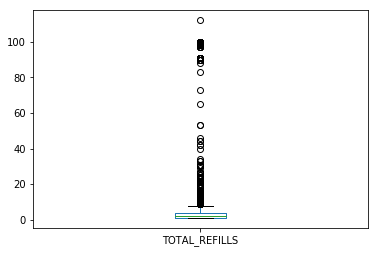

In [81]:
#check total refills column for completely wrong or not usefull data
final_file['TOTAL_REFILLS'].plot.box()
q2=np.median(Rx_data['TOTAL_REFILLS'])
q1=np.median(Rx_data[Rx_data['TOTAL_REFILLS']<=q2]['TOTAL_REFILLS'])
q3=np.median(Rx_data[Rx_data['TOTAL_REFILLS']>=q2]['TOTAL_REFILLS'])
iqr=q3-q1
ll=q2-1.5*iqr
ul=q3+1.5*iqr
print('Lower Limit',ll,' and upper limit is',ul,'iqr',iqr,'q1',q1,'q2',q2,'q3',q3)
final_file=final_file.drop(Rx_data[Rx_data['TOTAL_REFILLS']>ul].index,axis=0)

In [82]:
#Drop column description,INVENTORY_ITEM_ID as these are mere seqences
final_file=final_file.drop(['DESCRIPTION','INVENTORY_ITEM_ID'],axis=1)


Lower Limit 47.5  and upper limit is 99.5 iqr 15.0 q1 62.0 q2 70.0 q3 77.0


Index(['ORGANIZATION_ID', 'AGE', 'IS_MALE', 'IS_RX_HFF', 'RX_NUMBER',
       'PATIENT_ACCOUNT_ID', 'TOTAL_REFILLS', 'REMAINING_REFILLS',
       'DATE_DISCONTINUED', 'DATE_EXPIRED', 'DATE_WRITTEN', 'DAW_CODE',
       'DAYS_SUPPLY', 'DATE_LAST_FILLED', 'LAST_REFILL_MONTH',
       'DATE_WRITTEN_MONTH', 'CARRIER', 'ACCOUNT', 'CAG_GROUP', 'STATE',
       'POSTAL_CODE', 'COUNTY', 'CITY', 'DATE_FOR_NEXT_FILL', 'NDC', 'GPI',
       'IS_REFRIGIRATED', 'IS_DIABETIC', 'IS_RESPIRATORY', 'IS_CONTROLLED',
       'IS_INJECTABLE', 'IS_OTC', 'IS_CROSSOVER', 'IS_ANCILLARY', 'IS_BRANDED',
       'SUCCESS_FLAG', 'SPAN_AFTER_DISC', 'COPAY', 'CASH',
       'PRIMARY_PLAN_PAYMENT', 'SECONDARY_PLAN_PAYMENT', 'RX_TYPE',
       'MEMBER_LEVEL_HFF_FLAG', 'LANGUAGE_NAME'],
      dtype='object')

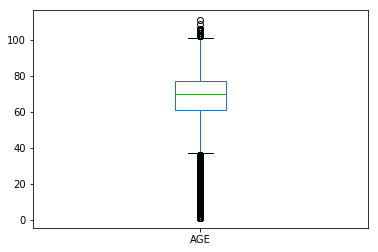

In [83]:
#start analyzing data from here
final_file['AGE'].plot.box()
q2=np.median(Rx_data['AGE'])
q1=np.median(Rx_data[Rx_data['AGE']<=q2]['AGE'])
q3=np.median(Rx_data[Rx_data['AGE']>=q2]['AGE'])
iqr=q3-q1
ll=q2-1.5*iqr
ul=q3+1.5*iqr
print('Lower Limit',ll,' and upper limit is',ul,'iqr',iqr,'q1',q1,'q2',q2,'q3',q3)
final_file.columns
#upper limit of age is 99 and lower is 35 but lets see if it has impact with other parameters like drug details

In [84]:

final_file['SPAN_AFTER_DISC']=final_file['SPAN_AFTER_DISC'].replace('',0)

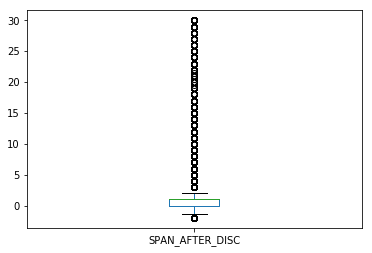

In [85]:

final_file['SPAN_AFTER_DISC'].plot.box()
#reset index
final_file=final_file.reset_index(drop=True)
#span after discontinue is how much after the rx discontinued new one is created. if its created after 10 days that dat is wrong

In [15]:
#final_file[['CITY','SUCCESS_FLAG','RX_NUMBER']].groupby(['CITY','SUCCESS_FLAG']).count()
#for i in range(30000,30500):#len(final_file)-1
 #   final_file.loc[i,'CITY']=final_file.loc[i,'CITY'].upper()
    #exit


#final_file.loc[39,'CITY']
final_file['CITY']

0                 ADELPHI
1                 Mosheim
2                   Bronx
3               Plainview
4             Carson City
5             San Antonio
6             OLMSTED TWP
7              Lauderhill
8             Bay Minette
9             Brownsville
10                  MINOA
11            Carson City
12              San Ramon
13               Glendale
14                CHICAGO
15        NORTH LAS VEGAS
16             FORT WORTH
17               Hopewell
18              LEWISBURG
19           SCHERERVILLE
20                ARCADIA
21             Cincinnati
22                Sunbury
23                  Ewing
24            SOUTHINGTON
25           Taylorsville
26                GRESHAM
27              Irvington
28               New York
29                Waldorf
               ...       
395682      College Point
395683           Holladay
395684             COLFAX
395685        KANSAS CITY
395686          CHARLOTTE
395687         Huntsville
395688       DANIELSVILLE
395689      

In [86]:
final_file.loc[100,'CITY'].upper()

'MARINE CITY'

In [87]:
final_file[['CAG_GROUP','CITY','CARRIER','ACCOUNT']]
#from sklearn.feature_extraction.text import CountVectorizer

,CAG_GROUP,CITY,CARRIER,ACCOUNT
0,071240300420042,ADELPHI,UHCACIS01,F
1,IS5820001A,Mosheim,PDPIND,P0101100000000
2,00008,Bronx,PSI1700,A
3,IR7444021AC2,Plainview,MPDOVA,M43003RAM82075
4,IS5921003K,Carson City,PDPIND,P0337300000000
5,IH4590017UMH,San Antonio,MPDOVA,M2B037HCFAC8
6,071187800290029,OLMSTED TWP,UHCACIS01,A
7,090671200180018,Lauderhill,UHCACNHP1,F
8,IH0151023A1,Bay Minette,MPDOVA,M04001BHM02250
9,F20AL,Brownsville,PSI2016,GE7


In [16]:
final_file['SUCCESS_FLAG'].value_counts()

Y          240187
IGNORE      79453
N           76068
UNKNOWN         4
Name: SUCCESS_FLAG, dtype: int64

In [88]:
#convert to numbers
cities=pd.unique(final_file['CITY'])
city_codes=[i for i in range(1,len(cities)+1)]
city_map=pd.DataFrame(dict(cities = cities, city_codes = city_codes))
city_map#[city_map['cities']=='Plainview']
final_file['RX_TYPE']=final_file['RX_TYPE'].replace('E',1)
final_file['RX_TYPE']=final_file['RX_TYPE'].replace('P',2)
final_file['MEMBER_LEVEL_HFF_FLAG']=final_file['MEMBER_LEVEL_HFF_FLAG'].map({'N':1,'Y':2})


In [89]:
final_file['LANGUAGE_NAME'] =final_file['LANGUAGE_NAME'].map({'ENG':1,'ESP':2})

In [90]:
final_file['SUCCESS_FLAG']=final_file['SUCCESS_FLAG'].map({'N':1,'Y':0,'IGNORE':0})

In [91]:
final_file_for_training=final_file.drop(['ORGANIZATION_ID','RX_NUMBER','PATIENT_ACCOUNT_ID','DATE_DISCONTINUED','DATE_EXPIRED'],axis=1)

In [122]:
#SUCCESS SCENARIOS ACROSS AGE
#Rx_data=Rx_data.fillna('')
#plt.plot(Rx_data['SUCCESS_FLAG'],Rx_data['IS_REFRIGIRATED'],'.')
#Rx_data[['SUCCESS_FLAG','AGE']][1:100].plot.bar()
#Rx_data[Rx_data['SUCCESS_FLAG']=='Y']['TOTAL_REFILLS'].value_counts()
#Rx_data[Rx_data['IS_MALE']==1]['SUCCESS_FLAG'].value_counts()
#IS_REFRIGIRATED is doesnt have direct impact (50-50)
#IS_DIABETIC --65% are non adherence if diabetic
#IS_RESPIRATORY --75% are non adherent if respiratory
#IS_CONTROLLED --10% re non adherent
#IS_INJECTABLE --all non adherent
#IS_CROSSOVER --80% are non adherent
#IS_ANCILLARY --75% are dherent
#IS_BRANDED -- 25% are non adherent
#if not branded--20% are non adherent
#Rx_data['INVENTORY_ITEM_ID'].count()
#if HFF ---adherent more more than 90%

Y         107024
IGNORE     34930
N          33196
Name: SUCCESS_FLAG, dtype: int64

In [215]:
#nav=lambda x:x**2+1
#nav(4)

17

In [120]:
target=final_file_for_training['SUCCESS_FLAG']
input_data=final_file_for_training.drop(['SUCCESS_FLAG'],axis=1)

In [217]:
#Divide GPI into subtypes
drug_group=final_file_for_training['GPI'].str[0:2]
drug_class=final_file_for_training['GPI'].str[2:4]
drug_sub_class=final_file_for_training['GPI'].str[4:6]
drug_name_code=final_file_for_training['GPI'].str[6:8]
drug_name_ext_code=final_file_for_training['GPI'].str[8:10]
drug_dosage=final_file_for_training['GPI'].str[10:12]
drug_strength=final_file_for_training['GPI'].str[12:14]

0         D3
1         D3
2         D3
3         D3
4         D3
5         D3
6         D3
7         D3
8         D3
9         D3
10        D3
11        D3
12        D3
13        D3
14        D3
15        D3
16        D3
17        D3
18        D3
19        D3
20        D3
21        D3
22        D3
23        D3
24        D3
25        D3
26        D3
27        D3
28        D3
29        D3
          ..
395682    75
395683    75
395684    75
395685    75
395686    75
395687    75
395688    75
395689    75
395690    75
395691    75
395692    75
395693    75
395694    75
395695    75
395696    75
395697    75
395698    75
395699    75
395700    75
395701    75
395702    75
395703    75
395704    75
395705    75
395706    03
395707    03
395708    03
395709    03
395710    75
395711    40
Name: GPI, Length: 395712, dtype: object

In [108]:
input_data['RX_TYPE'].value_counts()

1    316674
2     79038
Name: RX_TYPE, dtype: int64

In [121]:
np.cov(input_data['COPAY'],input_data['PRIMARY_PLAN_PAYMENT'])/(np.std(input_data['COPAY'])*np.std(input_data['PRIMARY_PLAN_PAYMENT']))
#input_data.columns
#np.std(input_data['COPAY'])
np.correlate(input_data['COPAY'],input_data['PRIMARY_PLAN_PAYMENT'])#/(np.std(input_data['COPAY'])*np.std(input_data['PRIMARY_PLAN_PAYMENT']))

array([1.60516706e+10])

In [122]:
input_data=input_data.drop(['DATE_WRITTEN_MONTH','LAST_REFILL_MONTH','CAG_GROUP','STATE','POSTAL_CODE','COUNTY',
                             'CITY','DATE_FOR_NEXT_FILL','DATE_WRITTEN','CARRIER','ACCOUNT','DATE_LAST_FILLED'],axis=1)



In [128]:
input_data['IS_MALE']=input_data['IS_MALE'].fillna('')
input_data['IS_MALE']=input_data['IS_MALE'].replace('',1)
input_data['IS_MALE'].value_counts()
input_data=input_data.drop(['GPI'],axis=1)

In [195]:
input_data.columns
#input_sample=input_data[['AGE','IS_MALE']]
input_data.cov()
eigen_values=np.linalg.eig(input_data.cov())[0]
eigen_vector=np.linalg.eig(input_data.cov())[1]

eigen_values.sort()
eigen_values

array([0.00000000e+00, 0.00000000e+00, 8.93047466e-04, 1.23948165e-03,
       1.55246260e-03, 4.18827407e-03, 1.24526659e-02, 1.98820404e-02,
       2.87196793e-02, 4.44525799e-02, 1.47341632e-01, 1.62939572e-01,
       1.89191691e-01, 2.22057105e-01, 2.47807781e-01, 7.92184624e-01,
       1.54530665e+00, 2.71418395e+00, 4.50686980e+01, 8.63538770e+01,
       1.96454209e+02, 5.57681303e+03, 8.63517100e+03, 5.09530874e+05])

In [196]:
#Standarding and usinf pca to reduce diemsnions just for practive
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(input_data)
from sklearn.decomposition import PCA
pca = PCA(n_components=8)
principalComponents = pca.fit_transform(x)

In [200]:
principalComponents.shape

(395712, 8)

In [147]:
#final=np.dot(input_data,eigen_vector)
final[0:10]
input_data=input_data.fillna(0)
#input_data=input_data.drop(['NDC'],axis=1)

AttributeError: 'DataFrame' object has no attribute 'filna'

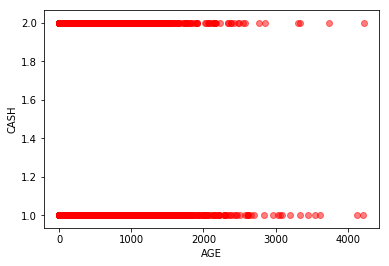

In [146]:
plt.scatter(input_data['COPAY'],input_data['RX_TYPE'],c="R", alpha=0.5)
plt.xlabel("AGE")
plt.ylabel("CASH")
input_data=input_data.filna('0')
target=target.fillna(1)

In [176]:
print('nulls present in output',target.isnull().any())
print('nuls present in input?',input_data.isnull().any())
#target=target.fillna(1)
#target

nulls present in output False
nuls present in input? AGE                       False
IS_MALE                   False
IS_RX_HFF                 False
TOTAL_REFILLS             False
REMAINING_REFILLS         False
DAW_CODE                  False
DAYS_SUPPLY               False
IS_REFRIGIRATED           False
IS_DIABETIC               False
IS_RESPIRATORY            False
IS_CONTROLLED             False
IS_INJECTABLE             False
IS_OTC                    False
IS_CROSSOVER              False
IS_ANCILLARY              False
IS_BRANDED                False
SPAN_AFTER_DISC           False
COPAY                     False
CASH                      False
PRIMARY_PLAN_PAYMENT      False
SECONDARY_PLAN_PAYMENT    False
RX_TYPE                   False
MEMBER_LEVEL_HFF_FLAG     False
LANGUAGE_NAME             False
dtype: bool


In [177]:
#create a model using input_data and target
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(input_data,target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [181]:
model.score(input_data,target)

0.993277939511564

In [137]:
#try to get ordered quantity for all the orders then load the orders again
#try matching with icd codes to rx if possible and get the new data nad repeat everything
#combine both data frames by taking average of (avg(copay)/(ordered qty))*100 --same for prim and sec payment
#create just alergy indicator and try using that try dates also to know when was that active
#finish this by 25th Night
#create sythetic variables
#start using models then